In [64]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [65]:
from lib.numpy_moments import cent_moment_k

# **ЛР 4.1**

In [66]:
ages = []
with open('moscow_2021.txt', 'r') as f:
    for l in f.readlines():
        ages.append(int(l.strip()))

## ***Функции***

### _Корреляция_

In [67]:
def covariation(nums1: np.ndarray, nums2: np.ndarray) -> float:
    return np.sum(cent_moment_k(nums1, 1)*cent_moment_k(nums2, 1))/nums1.size

def corr_coef(nums1: np.ndarray, nums2: np.ndarray) -> float:
    cor_mom = covariation(nums1, nums2)
    return cor_mom/(cent_moment_k(nums1, 2)*cent_moment_k(nums2, 2))**0.5

### _Проверки гипотез_

In [68]:
def corr_coef_criteria_observed(nums1: np.ndarray, nums2: np.ndarray) -> float:
    coef = corr_coef(nums1, nums2)
    N = nums1.size
    return coef*(N-2)**0.5 / (1-coef**2)**0.5

def corr_coef_criteria_critical(alpha: float, freedom_degs: int):
    return stats.t.ppf(1-alpha/2, df=freedom_degs)

## ***Работа с данными***

In [69]:
alpha = 0.05

ages_array = np.array(ages)
age_values, age_freqs = np.unique(ages_array, return_counts=True)

In [70]:
print(f"cov(x,y) = {covariation(age_values, age_freqs):.3f}")
print(f"sigma_x = {cent_moment_k(age_values, 2):.3f}")
print(f"sigma_y = {cent_moment_k(age_freqs, 2):.3f}")
print(f"r_xy = {corr_coef(age_values, age_values):.3f}")

cov(x,y) = 0.000
sigma_x = 285.070
sigma_y = 170909.879
r_xy = 0.000


In [71]:
ages_abs_T_obs = abs(corr_coef_criteria_observed(age_values, age_freqs))
ages_T_crit = corr_coef_criteria_critical(alpha, age_values.size-2)

print(f"|T_obs| = {ages_abs_T_obs:.3f}")
print(f"T_crit = {ages_T_crit:.3f}")

corr_signif = ages_abs_T_obs < ages_T_crit
corr_cmp = '<' if corr_signif else '>='
corr_status = 'accepted' if corr_signif else 'rejected'
print(f"|T_obs| {corr_cmp} T_crit")
print(f"Hypothesis {corr_status}")

|T_obs| = 0.000
T_crit = 2.003
|T_obs| < T_crit
Hypothesis accepted


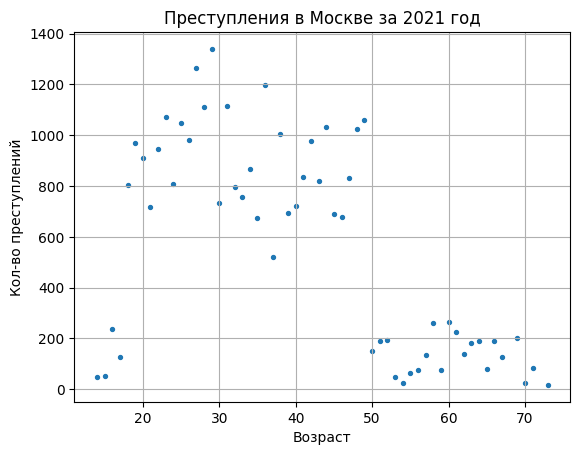

In [72]:
plt.scatter(age_values, age_freqs, s=8)
plt.xlabel("Возраст")
plt.ylabel("Кол-во преступлений")
plt.title("Преступления в Москве за 2021 год")
plt.grid()